# Context

This dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

# Content

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

# Attribute Information:

0-classes dible=e, poisonous=p

1-cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
    
2-cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

3-cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

4-bruises: bruises=t,no=f

5-dor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

6-gill-attachment: attached=a,descending=d,free=f,notched=n

7-gill-spacing: close=c,crowded=w,distant=d

8-gill-size: broad=b,narrow=n

9-gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

10-stalk-shape: enlarging=e,tapering=t

11-stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

12-stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

13-stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

14-stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

15-stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

16-veil-type: partial=p,universal=u

17-veil-color: brown=n,orange=o,white=w,yellow=y

18-ring-number: none=n,one=o,two=t

19-ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

20-spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

21-population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

22-habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Importing Requried Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Load the dataset
df=pd.read_csv('P1mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
## Checking shape of dataset
df.shape

(8124, 23)

Data set has 8124 rows and 23 columns including Target Variable.

In [4]:
## Getting the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Observation 


1- All features have object data type.

2-There is no missing values.

3- Our Target Feature is also Categorical.

In [5]:
# Checking Null values 
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

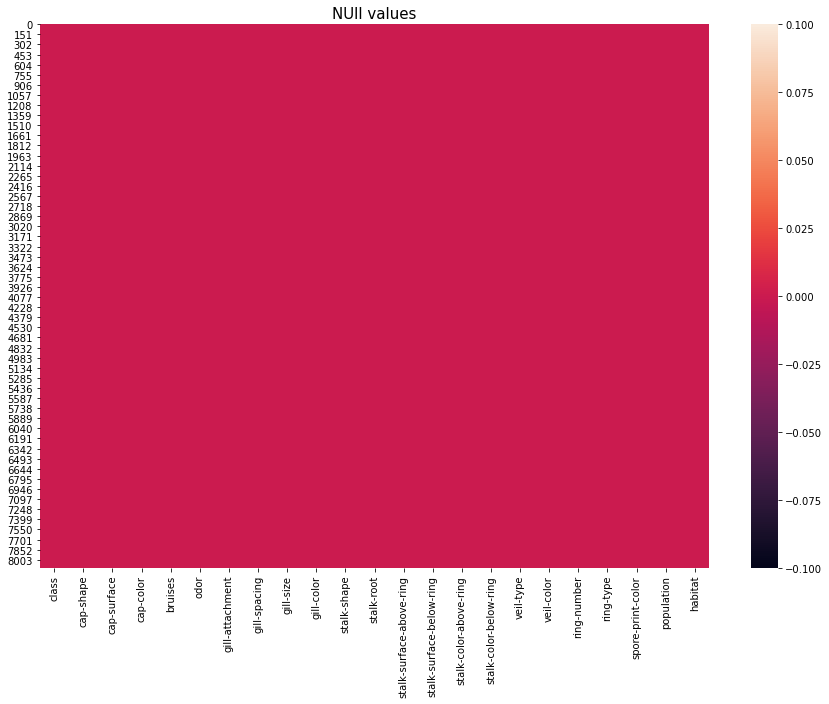

In [6]:
#visualization null values by heatmap
plt.figure(figsize=(15,10))
plt.title('NUll values',fontsize=15)
sns.heatmap(df.isnull())
plt.show()

Observation:
    
1- There is no null values in our dataset.    


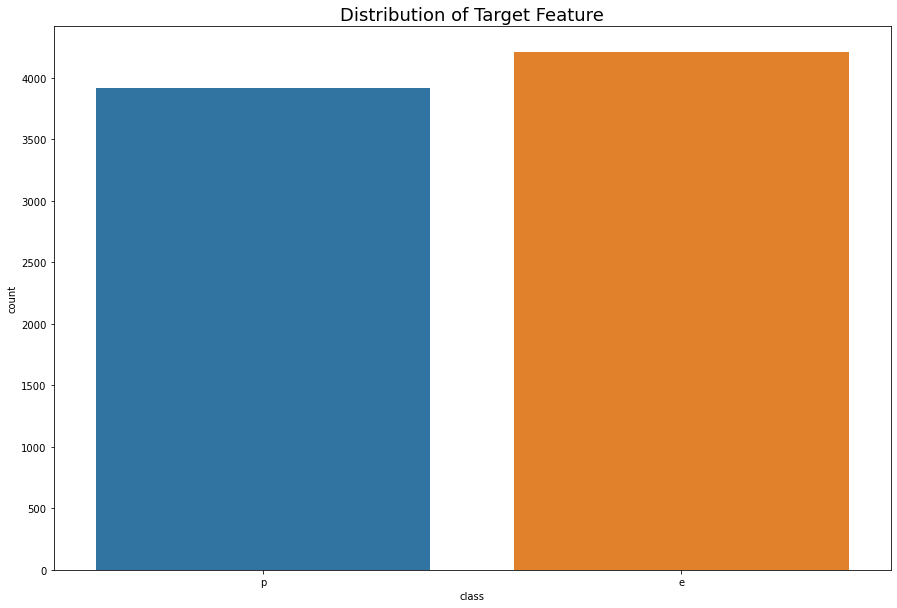

In [7]:
## Distribution of Target Variable 
plt.figure(figsize=(15,10))
plt.title('Distribution of Target Feature',fontsize=18)
sns.countplot(df['class'],data=df)
plt.show()

observation:

1- This shows us that Traget varibale have balanced data points.

2- Here, Two category p= poisonous, e=edible

In [8]:
## Checking value colunts of all categorical Features.
for i in df:
    print(i)
    print('---'*15)
    print(df[i].value_counts())

class
---------------------------------------------
e    4208
p    3916
Name: class, dtype: int64
cap-shape
---------------------------------------------
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
cap-surface
---------------------------------------------
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
cap-color
---------------------------------------------
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
bruises
---------------------------------------------
f    4748
t    3376
Name: bruises, dtype: int64
odor
---------------------------------------------
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
gill-attachment
---------------------------------------------
f    7914
a     210
Name: gill-attachment, dtype: int64
gill-spacing
-----------------------------------------

Observation:

1-In stalk-root features there are 2480 datapoints of '?' categeory which is wrong, we have to put some name this category.

2-veil-type feature have only one category which is 'p'



In [9]:
## Chaging '?' category with Unknown category
df.replace('?','Unknown',inplace=True)

In [10]:
## category has been changed
df['stalk-root'].value_counts()

b          3776
Unknown    2480
e          1120
c           556
r           192
Name: stalk-root, dtype: int64

# Data Preprocessing

In [11]:
## Label Encoding on all the categorical Features
for col in df:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

In [12]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# Assigning X and Y variable

In [13]:
## segregation between x and y
x=df.drop(['class'],axis=1)
y=df[['class']]

In [14]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [15]:
y

,class
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


# Machine learning Model Building

In [16]:
from sklearn.metrics import f1_score,classification_report,confusion_matrix,accuracy_score

def maxf1(clf,x,y):
    maxf1=0
    rs=0
    for rs in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=rs,stratify=y)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        score_f1=f1_score(y_test,pred)
        if score_f1>maxf1:
            maxf1=score_f1
            final_rs=rs
    print("maximum f1_score is at random state :",final_rs," and it is :",maxf1)      
        

In [17]:
##Using Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
maxf1(lr,x,y)

maximum f1_score is at random state : 62  and it is : 0.95729764181007


# Creating train-test split


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=62)

In [19]:
lrr=LogisticRegression()
lrr.fit(x_train,y_train)
predlr=lrr.predict(x_test)
print('Accucacy score',accuracy_score(y_test,predlr))
print('f1_score',f1_score(y_test,predlr))
print('Confusion matrix',confusion_matrix(y_test,predlr))
print('Classification report',classification_report(y_test,predlr))

Accucacy score 0.9538461538461539
f1_score 0.9522597071928708
Confusion matrix [[802  28]
 [ 47 748]]
Classification report               precision    recall  f1-score   support

           0       0.94      0.97      0.96       830
           1       0.96      0.94      0.95       795

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [20]:
from sklearn.model_selection import cross_val_score
print('Mean f1 score for Logistic Regression',cross_val_score(lrr,x,y,cv=7,scoring='f1').mean())

print('standard devation of f1 score for Logistic Regression',cross_val_score(lrr,x,y,cv=7,scoring='f1').std())

print('Cross Val score for Logistic Regression',cross_val_score(lrr,x,y,cv=7,scoring='f1'))

Mean f1 score for Logistic Regression 0.8666352177997355
standard devation of f1 score for Logistic Regression 0.1312623062492049
Cross Val score for Logistic Regression [0.57638889 0.95154185 0.97080292 0.83904465 0.98085688 0.92076731
 0.82704403]


# Decision Tree Classifier

In [21]:
### Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
maxf1(dt,x,y)

maximum f1_score is at random state : 42  and it is : 1.0


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)


In [23]:
dtt=DecisionTreeClassifier()
dtt.fit(x_train,y_train)
preddt=dtt.predict(x_test)
print('Accucacy score',accuracy_score(y_test,preddt))
print('f1_score',f1_score(y_test,preddt))
print('Confusion matrix',confusion_matrix(y_test,preddt))
print('Classification report',classification_report(y_test,preddt))

Accucacy score 1.0
f1_score 1.0
Confusion matrix [[843   0]
 [  0 782]]
Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [24]:
## Cross Validation of Decision Tree
print('Mean f1 score for Decision Tree',cross_val_score(dtt,x,y,cv=7,scoring='f1').mean())

print('standard devation of f1 score for Desision Tree',cross_val_score(dtt,x,y,cv=7,scoring='f1').std())

print('Cross Val score for Desision Tree',cross_val_score(dtt,x,y,cv=7,scoring='f1'))

Mean f1 score for Decision Tree 0.9178562894691928
standard devation of f1 score for Desision Tree 0.12514618286417686
Cross Val score for Desision Tree [0.7037037  1.         1.         1.         1.         1.
 0.76551724]


# KNeighbors Classifier

In [25]:
### KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
maxf1(knn,x,y)

maximum f1_score is at random state : 46  and it is : 1.0


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=46)

In [27]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predkn=knn.predict(x_test)
print('Accucacy score',accuracy_score(y_test,predkn))
print('f1_score',f1_score(y_test,predkn))
print('Confusion matrix',confusion_matrix(y_test,predkn))
print('Classification report',classification_report(y_test,predkn))

Accucacy score 0.9987692307692307
f1_score 0.9987714987714987
Confusion matrix [[810   2]
 [  0 813]]
Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       812
           1       1.00      1.00      1.00       813

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [28]:
## Cross Validation Score
print('Mean f1 score for KNN',cross_val_score(knn,x,y,cv=7,scoring='f1').mean())

print('standard devation of f1 score KNN',cross_val_score(knn,x,y,cv=7,scoring='f1').std())

print('Cross Val score for KNN',cross_val_score(knn,x,y,cv=7,scoring='f1'))

Mean f1 score for KNN 0.9236601203411894
standard devation of f1 score KNN 0.11098720780780214
Cross Val score for KNN [0.71766029 0.99554764 0.99821109 0.97053407 1.         0.99910634
 0.7845614 ]


# Support Vector Machine

In [29]:
###SVM
from sklearn.svm import SVC
svm=SVC()
maxf1(svm,x,y)

maximum f1_score is at random state : 77  and it is : 0.9948717948717949


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=77)

In [31]:
svm=SVC()
svm.fit(x_train,y_train)
predsvm=svm.predict(x_test)
print('Accucacy score',accuracy_score(y_test,predsvm))
print('f1_score',f1_score(y_test,predsvm))
print('Confusion matrix',confusion_matrix(y_test,predsvm))
print('Classification report',classification_report(y_test,predsvm))

Accucacy score 0.9926153846153846
f1_score 0.9920424403183024
Confusion matrix [[865   3]
 [  9 748]]
Classification report               precision    recall  f1-score   support

           0       0.99      1.00      0.99       868
           1       1.00      0.99      0.99       757

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [32]:
## Cross Validation Score
print('Mean f1 score for SVM',cross_val_score(svm,x,y,cv=7,scoring='f1').mean())

print('standard devation of f1 score SVM',cross_val_score(svm,x,y,cv=7,scoring='f1').std())

print('Cross Val score for SVM',cross_val_score(svm,x,y,cv=7,scoring='f1'))

Mean f1 score for SVM 0.8901500312330025
standard devation of f1 score SVM 0.13454195624145815
Cross Val score for SVM [0.69124424 0.99821429 0.98734177 0.9049951  0.99369937 0.98156277
 0.67399267]


# Random Forest Classifier

In [33]:
## Random Forest 
from sklearn.ensemble import RandomForestClassifier
rd=RandomForestClassifier()
maxf1(rd,x,y)

maximum f1_score is at random state : 42  and it is : 1.0


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
rdd=RandomForestClassifier()
rdd.fit(x_train,y_train)
predrd=rdd.predict(x_test)
print('Accucacy score',accuracy_score(y_test,predrd))
print('f1_score',f1_score(y_test,predrd))
print('Confusion matrix',confusion_matrix(y_test,predrd))
print('Classification report',classification_report(y_test,predrd))

Accucacy score 1.0
f1_score 1.0
Confusion matrix [[843   0]
 [  0 782]]
Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [35]:
## Cross Validation
print('Mean f1 score for Random Forest',cross_val_score(rdd,x,y,cv=7,scoring='f1').mean())

print('standard devation of f1 score  Random Forest',cross_val_score(rdd,x,y,cv=7,scoring='f1').std())

print('Cross Val score for  Random Forest',cross_val_score(rdd,x,y,cv=7,scoring='f1'))

Mean f1 score for Random Forest 0.9217186205138014
standard devation of f1 score  Random Forest 0.12554647422384121
Cross Val score for  Random Forest [0.7037037  1.         1.         1.         1.         1.
 0.72175597]


Minimum difference in f1 score and cross validation score is for KNN classifier so this is our best model.

# Hyper parameter Tuning


In [36]:
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=46)

In [37]:
param={'n_neighbors':np.arange(5,21),'leaf_size':np.arange(1,50)}
GCV=GridSearchCV(KNeighborsClassifier(),param,cv=5)

In [38]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])})

In [39]:
#printing the best parameters found by GridSearchCV
GCV.best_params_

{'leaf_size': 1, 'n_neighbors': 5}

In [40]:
mod=KNeighborsClassifier(leaf_size=1,n_neighbors=5,)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print('New Accuracy',accuracy_score(y_test,pred))
print('New f1 score',f1_score(y_test,pred))

New Accuracy 0.9987692307692307
New f1 score 0.9987714987714987


# Saving the model

In [41]:
import joblib
joblib.dump(mod,'P1Mushroomknn.pkl')

['P1Mushroomknn.pkl']

# Loading the saved model

In [42]:
model=joblib.load('P1Mushroomknn.pkl')

In [43]:
prediction=model.predict(x_test)

In [44]:
print(accuracy_score(y_test,prediction))
print(f1_score(y_test,prediction))

0.9987692307692307
0.9987714987714987


In [45]:
## Creating the dataframe
prediction=pd.DataFrame(prediction)

In [46]:
##saving the  prediction
prediction.to_csv('MushroomResult.csv')